Don't forget to apply the most suitable missing value filling techniques you applied in the previous checkpoint to the data. You're supposed to provide your answers to the following questions after you handled the missing values.

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Derive the descriptive statistics of the data and discuss the points you find remarkable.
2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.
3. In your chosen state, which of the lessons are the students more successful, math or reading?
4. What are the distributions of the math and reading scores in the sample?
5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

In [127]:
%matplotlib inline
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import seaborn as sns
from matplotlib import pyplot as plt

warnings.filterwarnings('ignore')

In [110]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from useducation',con=engine)

Don't forget to apply the most suitable missing value filling techniques from the previous checkpoint to the data. Provide the answers to the following only after you've addressed missing values!

In this assignment, I used fill with average within the state, since this approach can fill most of the missing values, and distingish the features between states.

In [111]:
# fillna with average
df.info()
df.head()

df_fill = df.copy()
for state in df_fill.STATE.unique():
    for col in df_fill.columns.unique():
            if col not in ['PRIMARY_KEY', 'STATE', 'YEAR']:
    #             print(state, col, df_2[df_2.STATE == state][col].mean())
#                 df_fill[col].fillna(df_fill[col].mean(), inplace=True)
#                 df_fill.loc[df_fill.STATE==state, col] = df_fill.loc[df_fill.STATE==state, col].interpolate()
                df_fill.loc[df_fill.STATE==state, col] = df_fill.loc[df_fill.STATE==state, col].fillna(df_fill.loc[df_fill.STATE==state, col].mean())
    
df_fill.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

1. Derive the descriptive statistics of the data and discuss the points you find remarkable.
ANS: hard to tell, looks normal to me. Maybe visulaization is more straightforard?

In [112]:
# for col in df_fill.columns.unique():
#     print(df_fill[col].describe())
df_fill.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492.000000,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03,...,1488.000000,1488.000000,1488.000000,1.488000e+03,1.488000e+03,1.451000e+03,1331.000000,1331.000000,1331.000000,1331.000000
mean,2004.433646,9.160580e+05,9.092664e+06,7.664310e+05,4.216914e+06,4.109319e+06,9.197265e+06,4.763269e+06,2.680485e+06,4.292705e+05,...,63920.470186,63649.323593,53742.326058,5.142279e+05,2.446825e+05,7.947983e+05,234.943370,278.672267,218.967074,263.707005
std,7.393983,1.064834e+06,1.171056e+07,1.139567e+06,5.527828e+06,5.466576e+06,1.194355e+07,6.274905e+06,3.343404e+06,5.318863e+05,...,80135.132028,78751.738911,67657.082777,6.423948e+05,3.069626e+05,9.758394e+05,8.121614,9.083356,7.146623,4.375295
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,633.000000,437.000000,311.000000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,1998.000000,2.569087e+05,2.185332e+06,1.899575e+05,1.153090e+06,7.205660e+05,2.165280e+06,1.171336e+06,6.354740e+05,1.033155e+05,...,13235.500000,12973.000000,10736.000000,1.063222e+05,4.976450e+04,1.717210e+05,230.635157,273.725099,215.235824,261.902652
50%,2004.000000,6.490130e+05,5.086083e+06,4.074320e+05,2.542639e+06,2.058996e+06,5.245560e+06,2.659448e+06,1.529158e+06,2.718120e+05,...,42689.000000,42889.708333,36502.666667,3.415340e+05,1.612105e+05,5.348370e+05,236.505145,280.619538,220.889682,264.069274
75%,2011.000000,1.010687e+06,1.084516e+07,8.279320e+05,5.125108e+06,4.768979e+06,1.074420e+07,5.573844e+06,3.222924e+06,5.165750e+05,...,75260.750000,75689.500000,67432.000000,6.086170e+05,2.894965e+05,9.202025e+05,240.174389,284.715434,223.519127,265.730064
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,5.944746e+06,253.420961,300.568235,236.773867,280.499130


2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

ANS:"The number of states leaning heavily on tuition to pay for instruction at public colleges and universities grew last year, surpassing a significant symbolic milestone.

A total of 28 states used tuition to generate more than 50 percent of their total educational revenue in the 2017 fiscal year, according to the State Higher Education Executive Officers association’s annual State Higher Education Finance report, which was released today. It was the first time more than half of states were recorded relying more on tuition dollars than on government appropriations. Exactly 25 states did so in 2016."
https://www.insidehighered.com/news/2018/03/29/state-support-higher-ed-increased-2017-so-did-tuition-revenue

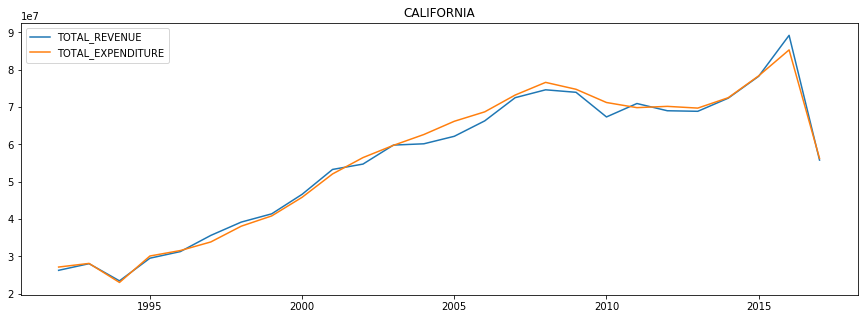

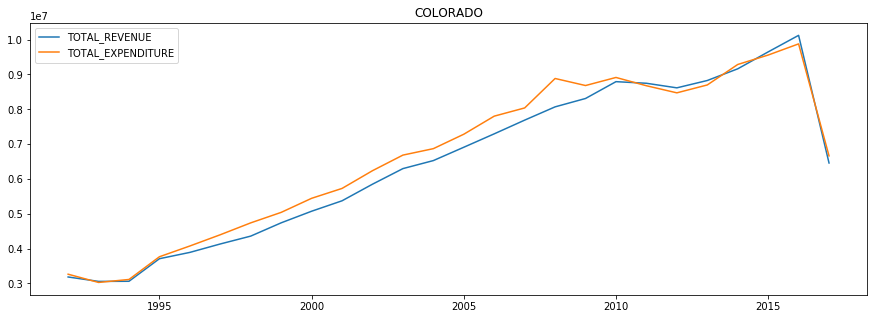

In [113]:
df_fill[df_fill.STATE=='CALIFORNIA'][['TOTAL_REVENUE', 'TOTAL_EXPENDITURE']].describe()
df_fill[df_fill.STATE=='CALIFORNIA'][['TOTAL_REVENUE', 'TOTAL_EXPENDITURE', 'YEAR']].head()

plt.figure(figsize = (15,5))
ax = plt.plot(df_fill[df_fill.STATE=='CALIFORNIA']['YEAR'].values,
              df_fill[df_fill.STATE=='CALIFORNIA'][['TOTAL_REVENUE', 'TOTAL_EXPENDITURE']].values)
plt.legend(['TOTAL_REVENUE','TOTAL_EXPENDITURE'])
plt.title('CALIFORNIA')
plt.show()


plt.figure(figsize = (15,5))
ax = plt.plot(df_fill[df_fill.STATE=='COLORADO']['YEAR'].values,
              df_fill[df_fill.STATE=='COLORADO'][['TOTAL_REVENUE', 'TOTAL_EXPENDITURE']].values)
plt.legend(['TOTAL_REVENUE','TOTAL_EXPENDITURE'])
plt.title('COLORADO')
plt.show()



In [114]:
df_fill.STATE.unique()

array(['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA',
       'COLORADO', 'CONNECTICUT', 'DELAWARE', 'DISTRICT_OF_COLUMBIA',
       'FLORIDA', 'GEORGIA', 'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA',
       'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARYLAND',
       'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI',
       'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW_HAMPSHIRE',
       'NEW_JERSEY', 'NEW_MEXICO', 'NEW_YORK', 'NORTH_CAROLINA',
       'NORTH_DAKOTA', 'OHIO', 'WYOMING', 'OKLAHOMA', 'OREGON',
       'PENNSYLVANIA', 'RHODE_ISLAND', 'SOUTH_CAROLINA', 'SOUTH_DAKOTA',
       'TENNESSEE', 'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON',
       'WEST_VIRGINIA', 'WISCONSIN', 'BUREAU_OF_INDIAN_AFFAIRS',
       'DOD_OVERSEAS', 'DOD_DOMESTIC', 'AMERICAN_SAMOA', 'GUAM',
       'NORTHERN_MARIANAS', 'PUERTO_RICO', 'VIRGIN_ISLANDS', 'BI', 'DD',
       'NORTHERN_MARIANA_ISLANDS', 'DEPARTMENT_OF_DEFENSE',
       'BUREAU_OF_INDIAN_EDUCATION',
       'DEPART

3. In your chosen state, which of the lessons are the students more successful, math or reading?

ANS: the analysis focus on California, for both 4th grade and 8th grade, students are more sucecessful in Math, cause their math score is higher. 

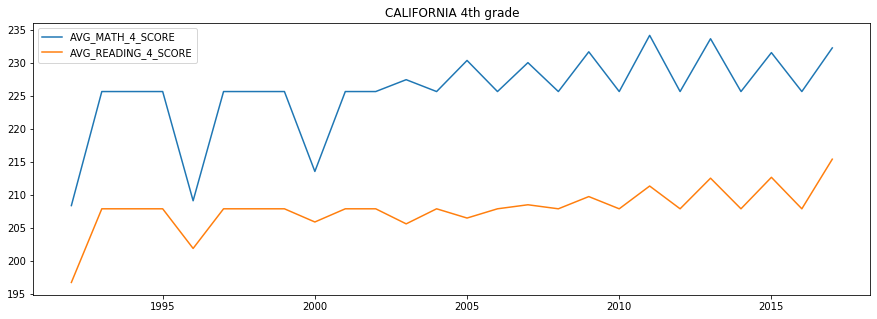

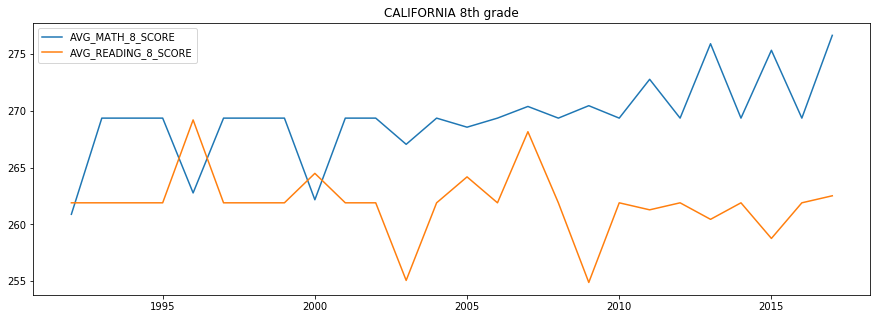

In [115]:
plt.figure(figsize = (15,5))
ax = plt.plot(df_fill[df_fill.STATE=='CALIFORNIA']['YEAR'].values,
              df_fill[df_fill.STATE=='CALIFORNIA'][['AVG_MATH_4_SCORE', 'AVG_READING_4_SCORE', ]].values)
plt.legend(['AVG_MATH_4_SCORE','AVG_READING_4_SCORE' ])
plt.title('CALIFORNIA 4th grade')
plt.show()

plt.figure(figsize = (15,5))
ax = plt.plot(df_fill[df_fill.STATE=='CALIFORNIA']['YEAR'].values,
              df_fill[df_fill.STATE=='CALIFORNIA'][['AVG_MATH_8_SCORE', 'AVG_READING_8_SCORE']].values)
plt.legend(['AVG_MATH_8_SCORE', 'AVG_READING_8_SCORE' ])
plt.title('CALIFORNIA 8th grade')
plt.show()

4. What are the distributions of the math and reading scores in the sample?

ANS: consider math and readning distribution among all states, but within 4th grade and 8th grade seperately.

Text(0.5, 1.0, 'AVG_READING_8_SCORE')

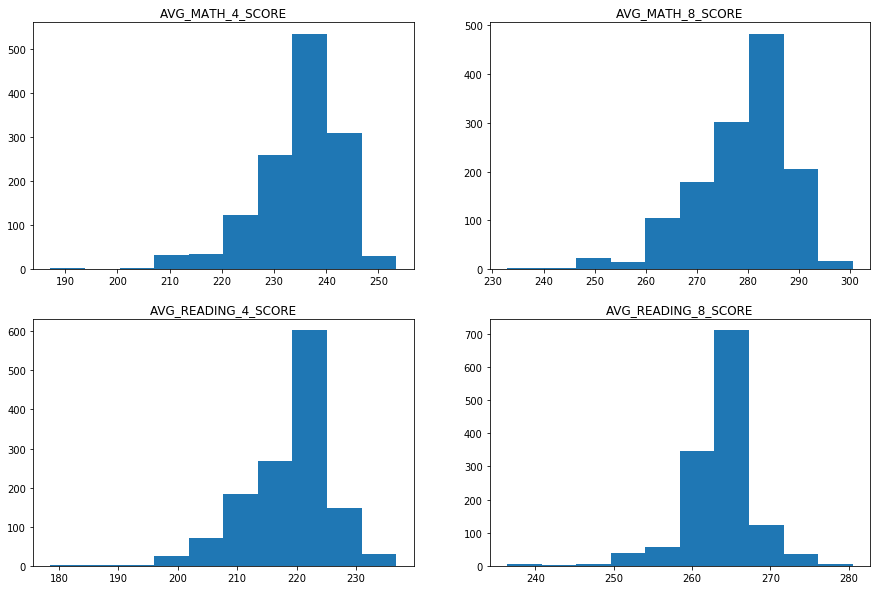

In [116]:
plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
plt.hist(df_fill['AVG_MATH_4_SCORE'])
plt.title('AVG_MATH_4_SCORE')

plt.subplot(2,2,2)
plt.hist(df_fill['AVG_MATH_8_SCORE'])
plt.title('AVG_MATH_8_SCORE')

plt.subplot(2,2,3)
plt.hist(df_fill['AVG_READING_4_SCORE'])
plt.title('AVG_READING_4_SCORE')

plt.subplot(2,2,4)
plt.hist(df_fill['AVG_READING_8_SCORE'])
plt.title('AVG_READING_8_SCORE')

5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

Text(0.5, 1.0, 'AVG_READING_8_SCORE')

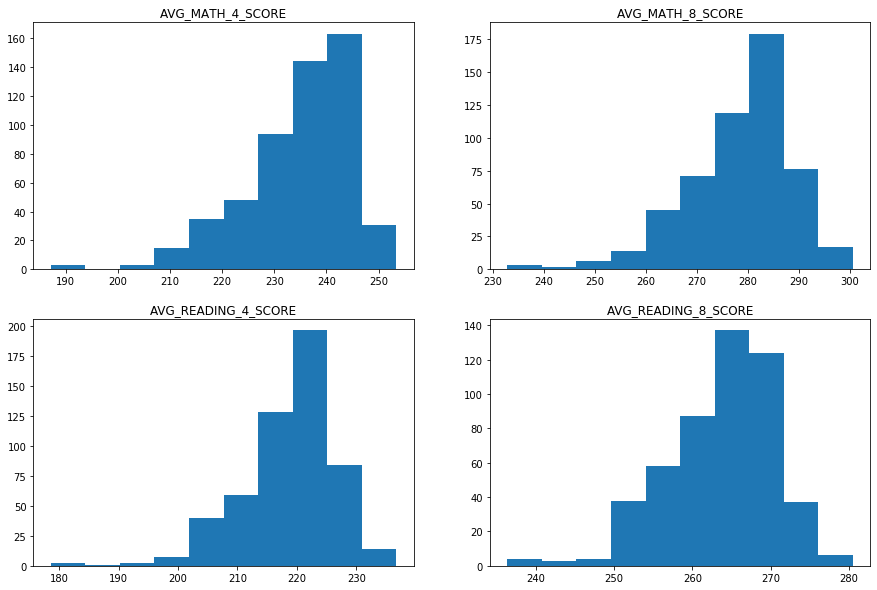

In [117]:
# let's check our original datasets again
df[['AVG_MATH_4_SCORE', 'AVG_READING_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_8_SCORE']].describe()

plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
plt.hist(df['AVG_MATH_4_SCORE'])
plt.title('AVG_MATH_4_SCORE')

plt.subplot(2,2,2)
plt.hist(df['AVG_MATH_8_SCORE'])
plt.title('AVG_MATH_8_SCORE')

plt.subplot(2,2,3)
plt.hist(df['AVG_READING_4_SCORE'])
plt.title('AVG_READING_4_SCORE')

plt.subplot(2,2,4)
plt.hist(df['AVG_READING_8_SCORE'])
plt.title('AVG_READING_8_SCORE')

Text(0.5, 1.0, 'AVG_READING_8_SCORE')

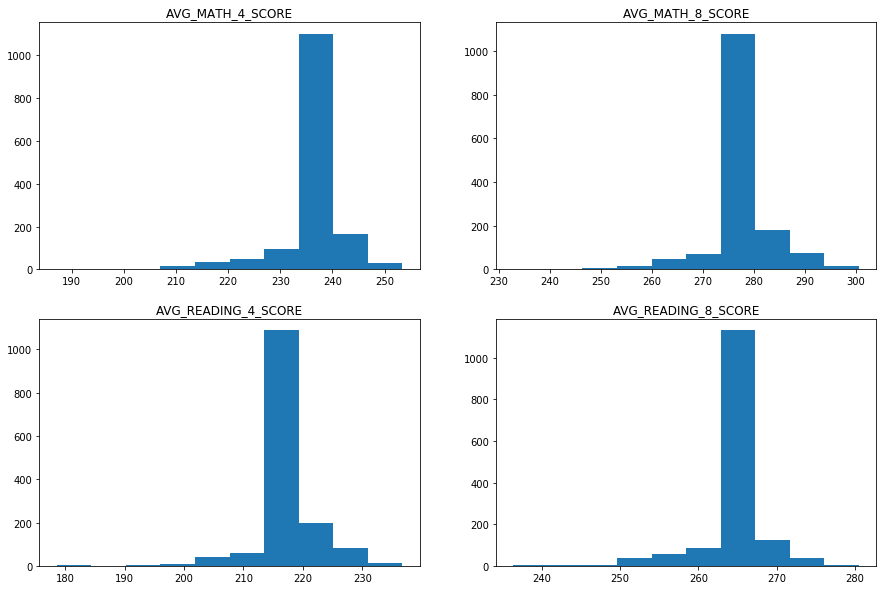

In [118]:
# fill in the missing value with average (regardless of states or year)
df_5_average = df.copy()
for col in df_5_average.columns.unique():
        if col not in ['PRIMARY_KEY', 'STATE', 'YEAR']:
#             print(state, col, df_2[df_2.STATE == state][col].mean())
#                 df_fill[col].fillna(df_fill[col].mean(), inplace=True)
#                 df_fill.loc[df_fill.STATE==state, col] = df_fill.loc[df_fill.STATE==state, col].interpolate()
            df_5_average.loc[:, col] = df_5_average.loc[:, col].fillna(df_5_average.loc[:, col].mean())

df_5_average.describe()    

df_5_average[['AVG_MATH_4_SCORE', 'AVG_READING_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_8_SCORE']].describe()

plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
plt.hist(df_5_average['AVG_MATH_4_SCORE'])
plt.title('AVG_MATH_4_SCORE')

plt.subplot(2,2,2)
plt.hist(df_5_average['AVG_MATH_8_SCORE'])
plt.title('AVG_MATH_8_SCORE')

plt.subplot(2,2,3)
plt.hist(df_5_average['AVG_READING_4_SCORE'])
plt.title('AVG_READING_4_SCORE')

plt.subplot(2,2,4)
plt.hist(df_5_average['AVG_READING_8_SCORE'])
plt.title('AVG_READING_8_SCORE')

Text(0.5, 1.0, 'AVG_READING_8_SCORE')

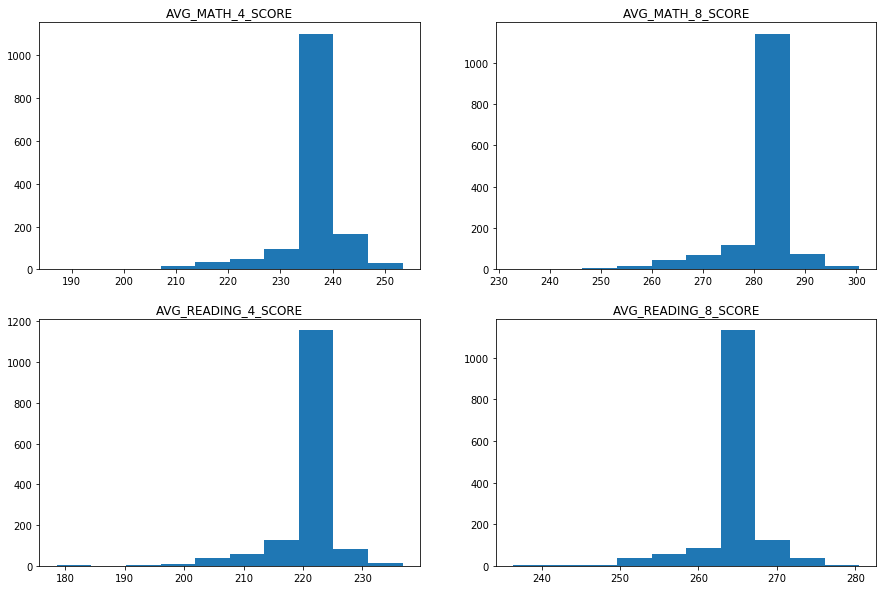

In [119]:
# fill in the missing value with median (regardless of states or year)
df_5_median = df.copy()
for col in df_5_median.columns.unique():
        if col not in ['PRIMARY_KEY', 'STATE', 'YEAR']:
#             print(state, col, df_2[df_2.STATE == state][col].mean())
#                 df_fill[col].fillna(df_fill[col].mean(), inplace=True)
#                 df_fill.loc[df_fill.STATE==state, col] = df_fill.loc[df_fill.STATE==state, col].interpolate()
            df_5_median.loc[:, col] = df_5_median.loc[:, col].fillna(df_5_median.loc[:, col].median())

df_5_median.describe()    

df_5_median[['AVG_MATH_4_SCORE', 'AVG_READING_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_8_SCORE']].describe()

plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
plt.hist(df_5_median['AVG_MATH_4_SCORE'])
plt.title('AVG_MATH_4_SCORE')

plt.subplot(2,2,2)
plt.hist(df_5_median['AVG_MATH_8_SCORE'])
plt.title('AVG_MATH_8_SCORE')

plt.subplot(2,2,3)
plt.hist(df_5_median['AVG_READING_4_SCORE'])
plt.title('AVG_READING_4_SCORE')

plt.subplot(2,2,4)
plt.hist(df_5_median['AVG_READING_8_SCORE'])
plt.title('AVG_READING_8_SCORE')

Text(0.5, 1.0, 'AVG_READING_8_SCORE')

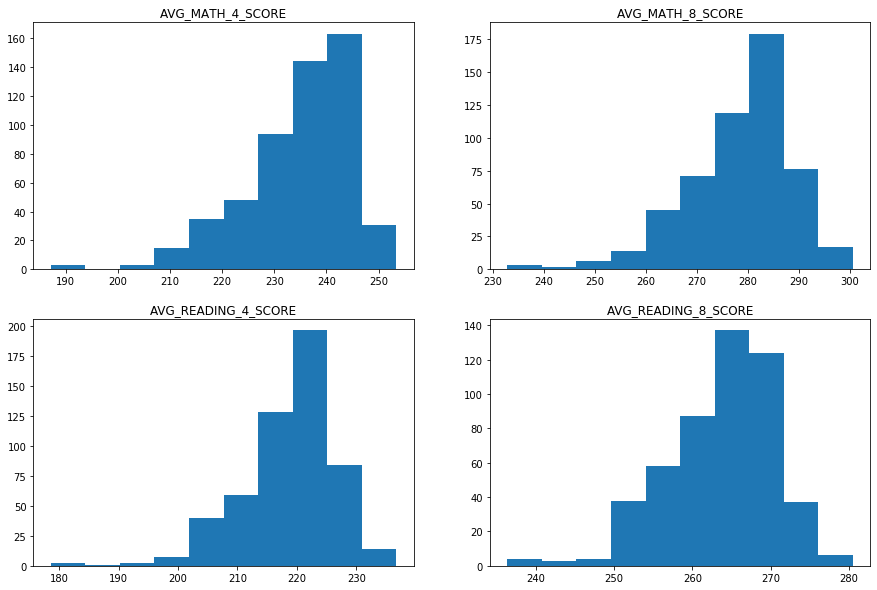

In [120]:
# fill in the missing value with interpolation (regardless of states or year)
df_5_interpolation = df.copy()
for col in df_5_interpolation.columns.unique():
        if col not in ['PRIMARY_KEY', 'STATE', 'YEAR']:
#             print(state, col, df_2[df_2.STATE == state][col].mean())
#                 df_fill[col].fillna(df_fill[col].mean(), inplace=True)
#                 df_fill.loc[df_fill.STATE==state, col] = df_fill.loc[df_fill.STATE==state, col].interpolate()
                df_5_interpolation.loc[:, col].interpolate()

df_5_interpolation.describe()    

df_5_interpolation[['AVG_MATH_4_SCORE', 'AVG_READING_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_8_SCORE']].describe()

plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
plt.hist(df_5_interpolation['AVG_MATH_4_SCORE'])
plt.title('AVG_MATH_4_SCORE')

plt.subplot(2,2,2)
plt.hist(df_5_interpolation['AVG_MATH_8_SCORE'])
plt.title('AVG_MATH_8_SCORE')

plt.subplot(2,2,3)
plt.hist(df_5_interpolation['AVG_READING_4_SCORE'])
plt.title('AVG_READING_4_SCORE')

plt.subplot(2,2,4)
plt.hist(df_5_interpolation['AVG_READING_8_SCORE'])
plt.title('AVG_READING_8_SCORE')

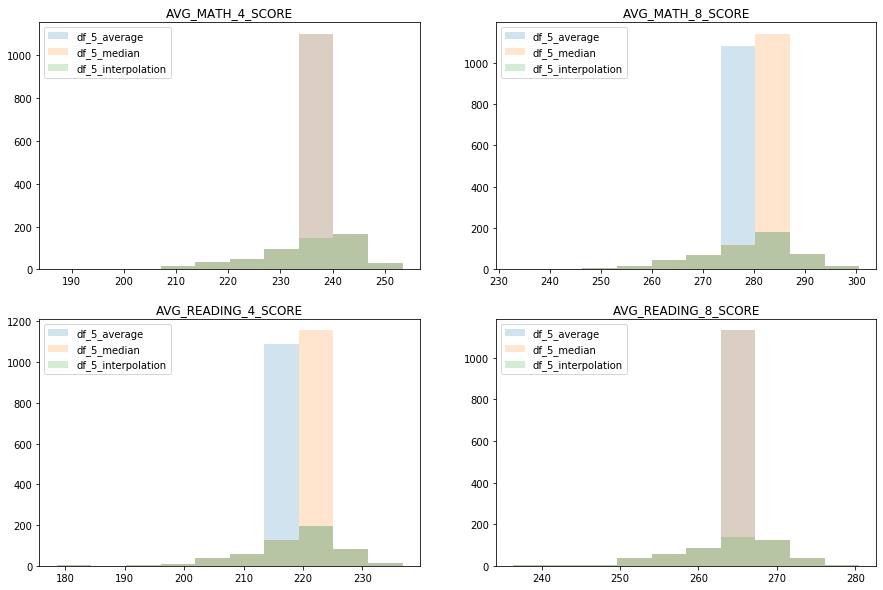

In [148]:
# compare the 3 filling methods

plt.figure(figsize = (15,10))
# f, ax = plt.subplots(2,2)

plt.subplot(2,2,1)
plt.hist(df_5_average['AVG_MATH_4_SCORE'], alpha=.2)
plt.hist(df_5_median['AVG_MATH_4_SCORE'], alpha=.2)
plt.hist(df_5_interpolation['AVG_MATH_4_SCORE'], alpha=.2)
plt.legend(['df_5_average','df_5_median','df_5_interpolation' ])
plt.title('AVG_MATH_4_SCORE')

plt.subplot(2,2,2)
plt.hist(df_5_average['AVG_MATH_8_SCORE'], alpha=.2)
plt.hist(df_5_median['AVG_MATH_8_SCORE'], alpha=.2)
plt.hist(df_5_interpolation['AVG_MATH_8_SCORE'], alpha=.2)
plt.legend(['df_5_average','df_5_median','df_5_interpolation' ])
plt.title('AVG_MATH_8_SCORE')

plt.subplot(2,2,3)
plt.hist(df_5_average['AVG_READING_4_SCORE'], alpha=.2)
plt.hist(df_5_median['AVG_READING_4_SCORE'], alpha=.2)
plt.hist(df_5_interpolation['AVG_READING_4_SCORE'], alpha=.2)
plt.legend(['df_5_average','df_5_median','df_5_interpolation' ])
plt.title('AVG_READING_4_SCORE')

plt.subplot(2,2,4)
plt.hist(df_5_average['AVG_READING_8_SCORE'], alpha=.2)
plt.hist(df_5_median['AVG_READING_8_SCORE'], alpha=.2)
plt.hist(df_5_interpolation['AVG_READING_8_SCORE'], alpha=.2)
plt.legend(['df_5_average','df_5_median','df_5_interpolation' ])
plt.title('AVG_READING_8_SCORE')



plt.show()


# takeaways:
- once again, I choose the "wrong" missing data filling method. I did consider the difference between states, but instead of filling with interpolation, I choose average filling, which is not very reasonable comparing to the example solution.
- the rest of the part I got it right, assuming the fillnu method doesn't matter, but actually it does matter. The data has totally different profile now. this is justifed in question 5.